In [45]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest,from_model
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

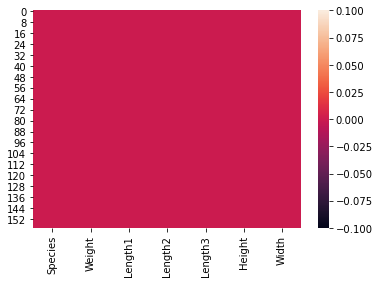

In [5]:
sns.heatmap(df.isnull())

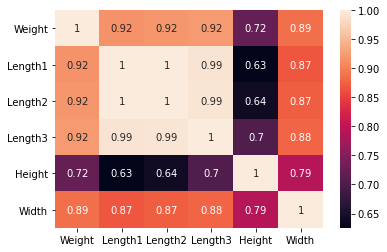

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
np.corrcoef(df['Height'],df['Length3'])

array([[1.        , 0.70340895],
       [0.70340895, 1.        ]])

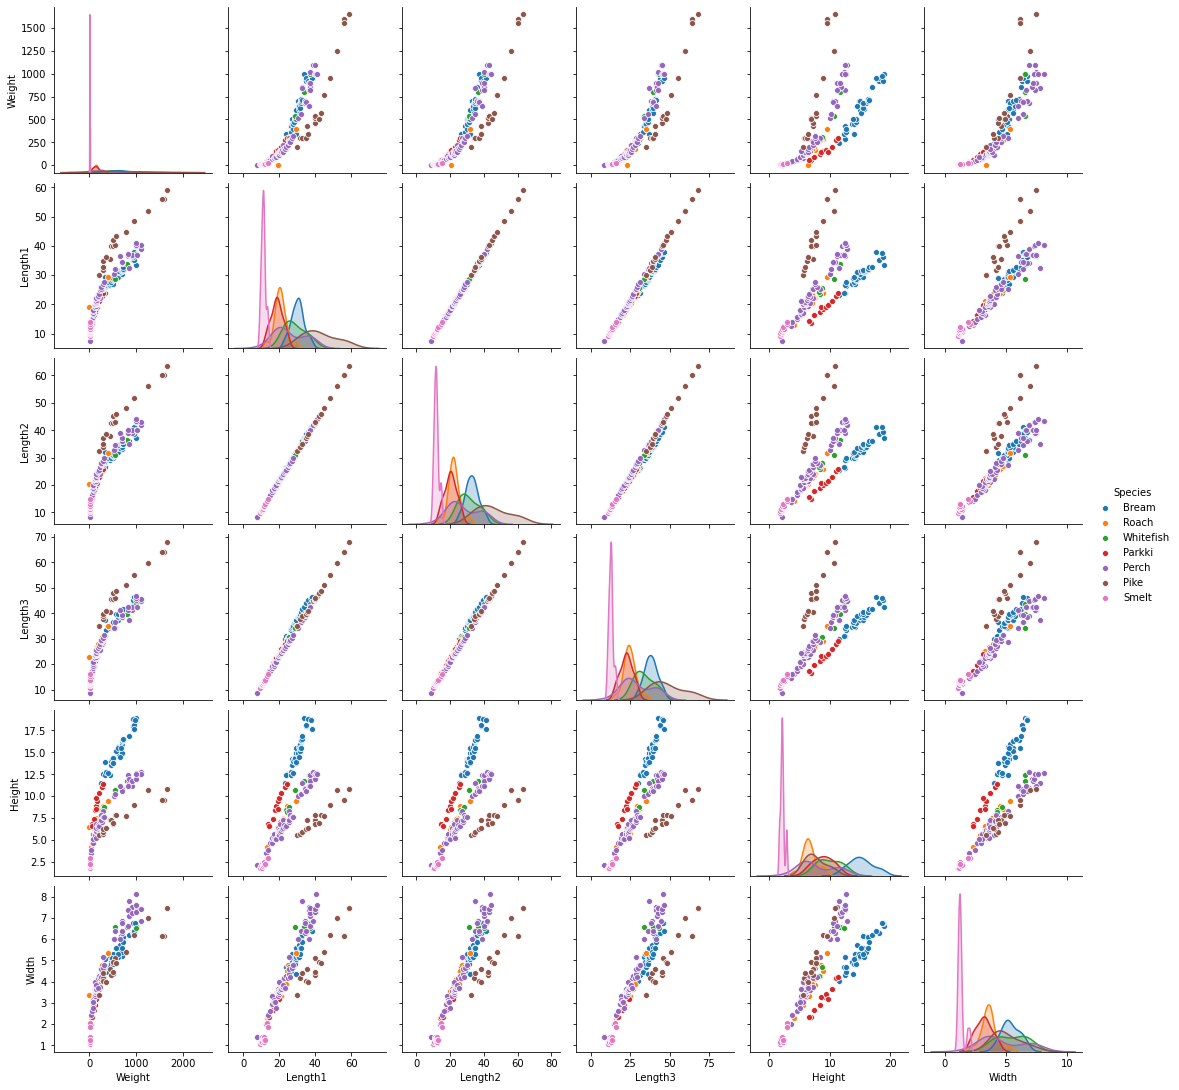

In [8]:
sns.pairplot(df,hue='Species')

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],random_state=42)


In [10]:
X_train.head()

,Weight,Length1,Length2,Length3,Height,Width
26,720.0,32.0,35.0,40.6,16.3618,6.0900
137,500.0,42.0,45.0,48.0,6.9600,4.8960
146,7.5,10.0,10.5,11.6,1.9720,1.1600
90,110.0,20.0,22.0,23.5,5.5225,3.9950
66,140.0,19.0,20.7,23.2,8.5376,3.2944


In [11]:
logit=LogisticRegression(max_iter=1000,C=0.2)
logit.fit(X_train,y_train)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.2, max_iter=1000)

In [12]:
logit.score(X_train,y_train),logit.score(X_test,y_test)

(0.9411764705882353, 0.925)

In [13]:
labelenc=LabelEncoder()
df['Species']=labelenc.fit_transform(df['Species'])

In [14]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [15]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],random_state=42)


In [16]:
logit=LogisticRegression(max_iter=1000,C=0.2)
logit.fit(X_train,y_train)
logit.score(X_train,y_train),logit.score(X_test,y_test)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9411764705882353, 0.925)

In [17]:
df1=df.copy()
df1.drop('Length2',axis=1,inplace=True)


In [18]:
X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,1:],df1.iloc[:,0],random_state=42)
logit=LogisticRegression(max_iter=1000,C=0.2)
logit.fit(X_train,y_train)
logit.score(X_train,y_train),logit.score(X_test,y_test)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.8991596638655462, 0.925)

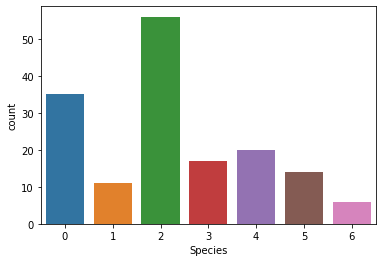

In [19]:
sns.countplot(df['Species'])

In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
logit=LogisticRegression(max_iter=1000,C=50)
logit.fit(X_train,y_train)
logit.score(X_train,y_train),logit.score(X_test,y_test)

(0.9411764705882353, 0.925)

In [22]:
from sklearn.datasets import make_regression

In [101]:
X,y=make_regression(n_samples=1000,n_features=5)

In [102]:
X.shape,y.shape

((1000, 5), (1000,))

In [103]:
df=pd.DataFrame(X,columns=['f1','f2','f3','f4','f5'])

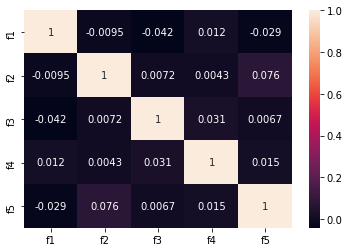

In [104]:
sns.heatmap(df.corr(),annot=True)

In [106]:
X_train,X_test,y_train,y_test=train_test_split(df,y,random_state=42)
logit=LinearRegression()
logit.fit(X_train,y_train)
logit.score(X_train,y_train),logit.score(X_test,y_test)

(1.0, 1.0)

In [52]:
data2=pd.read_csv('Bengaluru_House_Data.csv')

In [53]:
data2.shape

(13320, 9)

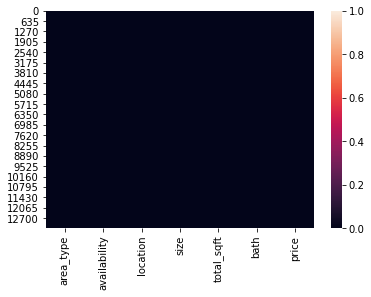

In [56]:
sns.heatmap(data2.isnull())

In [55]:
data2.drop(['society','balcony'],axis=1,inplace=True)

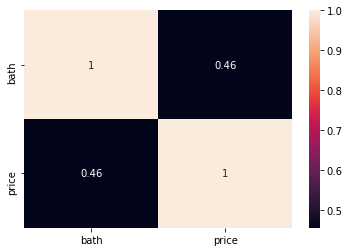

In [58]:
sns.heatmap(data2.corr(),annot=True)

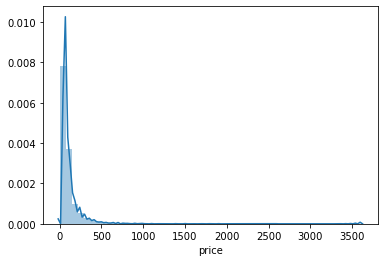

In [59]:
sns.distplot(data2['price'])

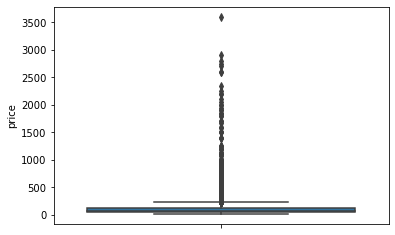

In [66]:
sns.boxplot(data=data2,y='price')

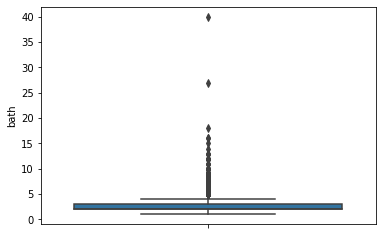

In [67]:
sns.boxplot(data=data2,y='bath')

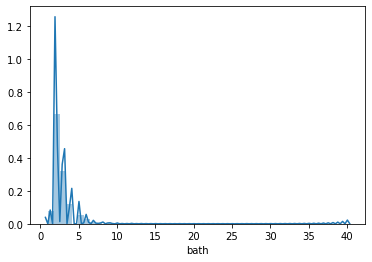

In [68]:
sns.distplot(data2['bath'])

In [69]:
bath_log=np.log(data2['bath'])
price_log=np.log(data2['price'])

C:\Users\rissu\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rissu\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.880e+02, 6.908e+03, 3.286e+03, 1.226e+03, 7.970e+02, 2.090e+02,
        2.600e+01, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.36888795, 0.73777589, 1.10666384, 1.47555178,
        1.84443973, 2.21332767, 2.58221562, 2.95110356, 3.31999151,
        3.68887945]),
 <a list of 10 Patch objects>)

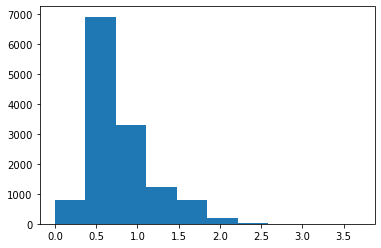

In [71]:
pl.hist(bath_log)

(array([  48.,  373., 3093., 5081., 2748., 1288.,  503.,  142.,   29.,
          15.]),
 array([2.07944154, 2.6903663 , 3.30129106, 3.91221582, 4.52314057,
        5.13406533, 5.74499009, 6.35591485, 6.96683961, 7.57776437,
        8.18868912]),
 <a list of 10 Patch objects>)

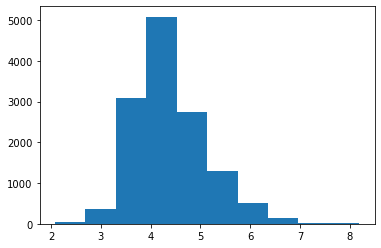

In [72]:
pl.hist(price_log)

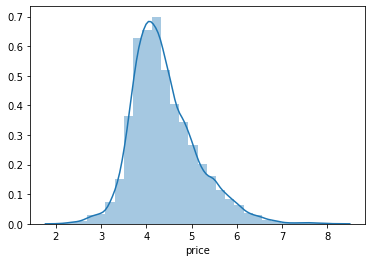

In [80]:
sns.distplot(price_log,bins=30)

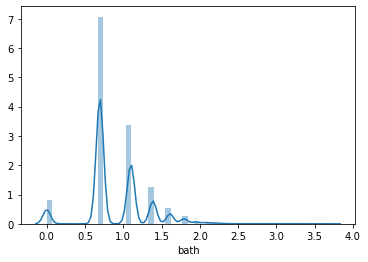

In [74]:
sns.distplot(bath_log)

In [81]:
price_log

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13315    5.442418
13316    5.991465
13317    4.094345
13318    6.190315
13319    2.833213
Name: price, Length: 13320, dtype: float64

In [83]:
data2['log_price']=price_log

In [85]:
data2.describe()

,bath,price,log_price
count,13247.000000,13320.000000,13320.000000
mean,2.692610,112.565627,4.395031
std,1.341458,148.971674,0.722003
min,1.000000,8.000000,2.079442
25%,2.000000,50.000000,3.912023
50%,2.000000,72.000000,4.276666
75%,3.000000,120.000000,4.787492
max,40.000000,3600.000000,8.188689


(1.0, 1.0)

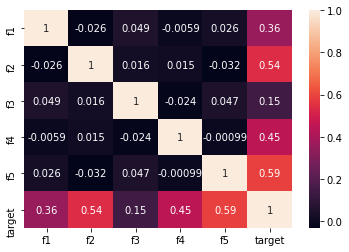

In [124]:
X,y=make_regression(n_samples=1000,n_features=5)
df=pd.DataFrame(X,columns=['f1','f2','f3','f4','f5'])
df['target']=y
sns.heatmap(df.corr(),annot=True)

X_train,X_test,y_train,y_test=train_test_split(X,y)
logit=LinearRegression()
logit.fit(X_train,y_train)
logit.score(X_train,y_train),logit.score(X_test,y_test)




In [110]:
X_train.head()

,f1,f2,f3,f4,f5
82,-0.130674,-0.133864,-0.018279,-0.320769,-0.277550
991,1.323130,0.465479,0.334534,-1.553584,-0.408451
789,-0.581024,1.337737,-0.695370,0.204540,0.770717
894,0.400154,0.068583,0.176070,0.344296,-0.782476
398,0.690257,-0.365130,-0.771158,0.718125,0.188907


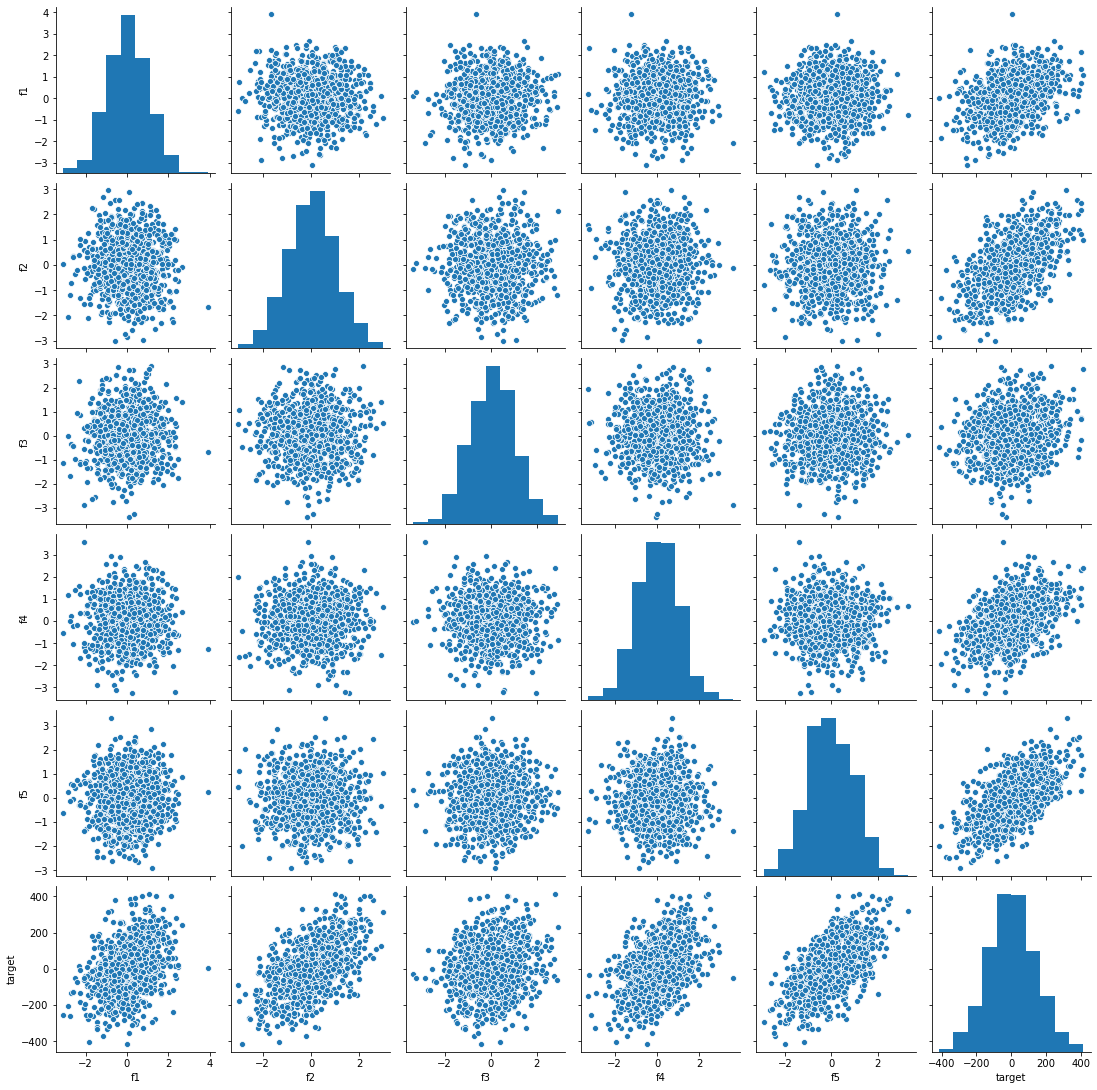

In [155]:
sns.pairplot(data=df)
pl.show()

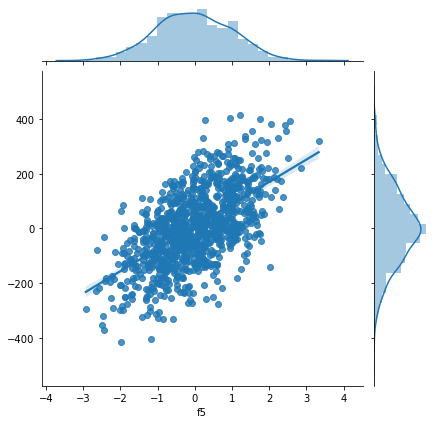

In [132]:
sns.jointplot(df['f5'],y,kind='reg')

In [139]:
coefs=logit.coef_
intercpt=logit.intercept_
coefs,intercpt

(array([50.12926117, 76.38161456, 14.02100884, 61.11391865, 82.33155389]),
 8.43769498715119e-15)

In [138]:
logit.predict([[0.921373,0.401957,1.140900,0.724564,-1.276063]])

array([32.10713708])

In [136]:
df.head()

,f1,f2,f3,f4,f5,target
0,0.921373,0.401957,1.140900,0.724564,-1.276063,32.107157
1,-0.234250,-0.522602,-1.610702,1.027329,0.652310,42.246134
2,1.868003,0.269120,2.173146,0.549313,-0.924748,102.101913
3,2.249919,-1.669571,-0.046511,-2.045184,-1.192058,-238.523034
4,-0.873005,-0.055021,-0.663820,-0.563773,1.608214,40.679251


In [140]:
inpt=np.array([0.921373,0.401957,1.140900,0.724564,-1.276063])

In [141]:
inpt

array([ 0.921373,  0.401957,  1.1409  ,  0.724564, -1.276063])

In [149]:
logit.predict([inpt])

array([32.10713708])

In [148]:
sum(inpt*coefs)+intercpt

32.10713708240676

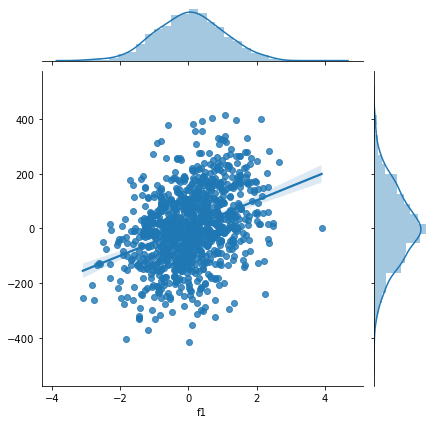

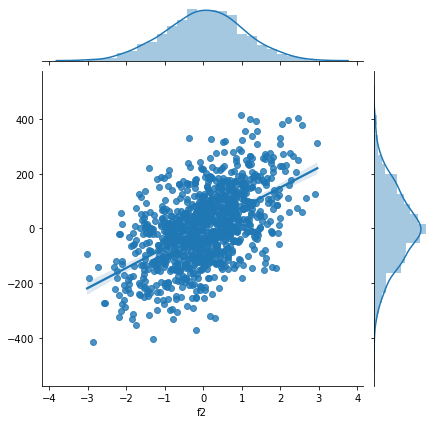

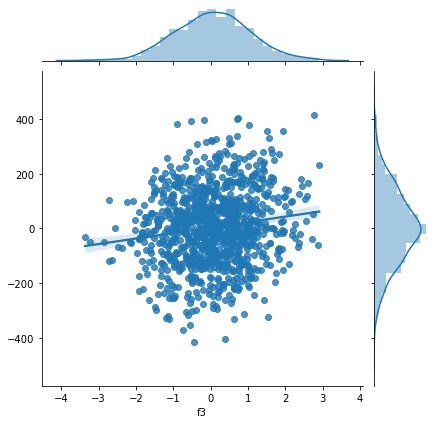

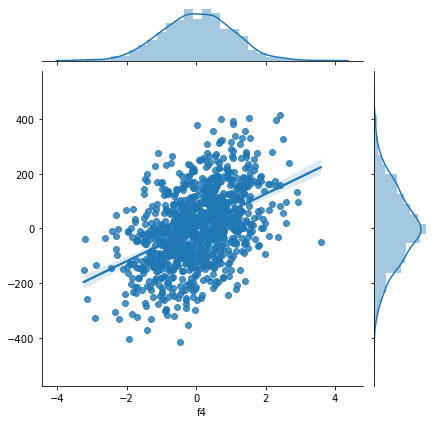

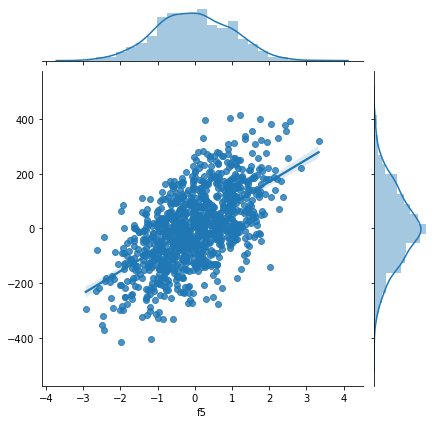

In [153]:
for i in range(len(df.columns)-1):
    sns.jointplot(df[df.columns[i]],y,kind='reg')
    pl.show()

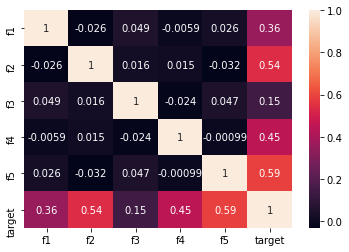

In [157]:
sns.heatmap(df.corr(),annot=True)

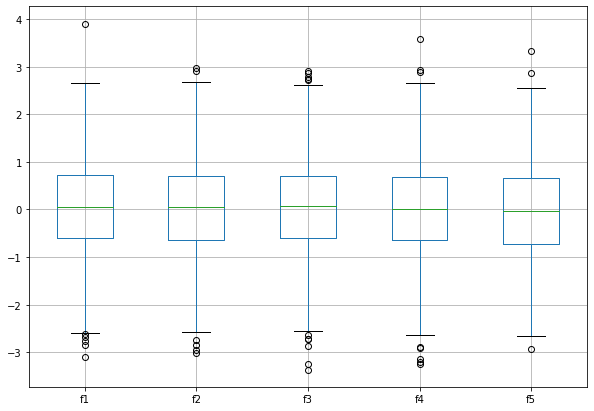

In [166]:
pl.figure(figsize=(10,7))
df.iloc[:,:-1].boxplot()
pl.show()

<Figure size 1440x720 with 0 Axes>

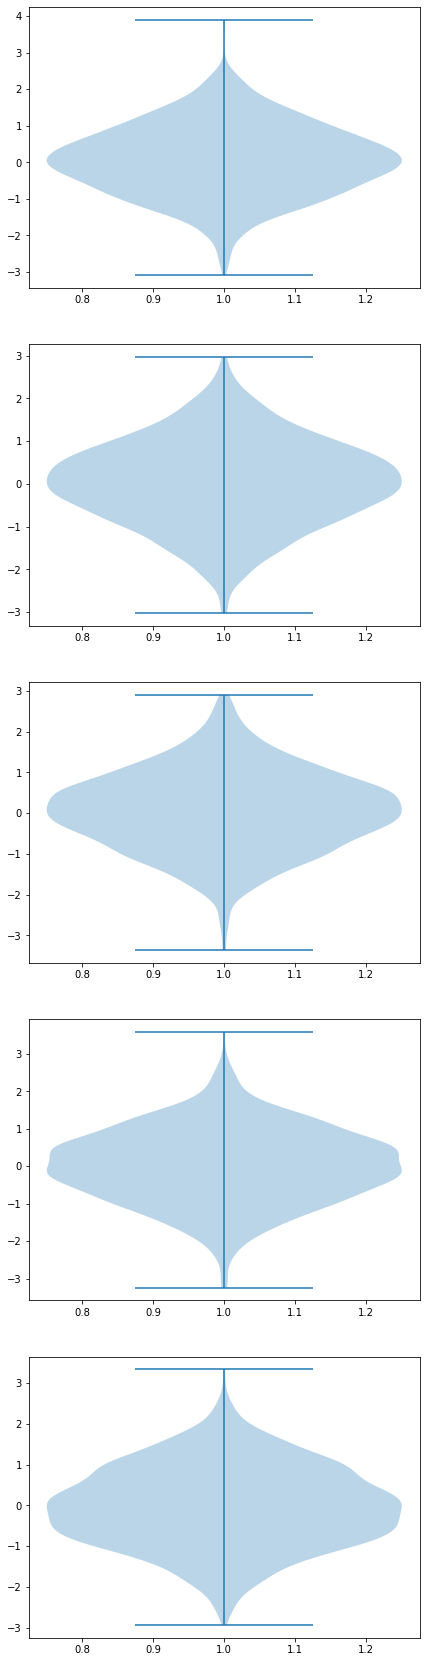

In [195]:
pl.figure(figsize=(20,10))
fig,ax=pl.subplots(5,figsize=(7,30))
ax[0].violinplot(df['f1'])
ax[1].violinplot(df['f2'])
ax[2].violinplot(df['f3'])
ax[3].violinplot(df['f4'])
ax[4].violinplot(df['f5'])

pl.show()